<h1 align="center"><b> Employee Attrition: Business Problem </b></h1><br>

<h3><b>Business Context</b></h3>
Employee attrition is one of the most significant challenges faced by organizations today. High turnover rates disrupt team dynamics, lead to loss of institutional knowledge, and result in increased recruitment and training costs. In our company, attrition has reached a level where it threatens our ability to maintain operational efficiency and achieve strategic objectives.

<h3><b>The Problem</b></h3>
Over the past year, we have observed a rising trend in employee turnover, particularly among certain demographics and job roles. Despite offering competitive salaries and benefits, many employees cite reasons such as lack of career growth, excessive workload, and dissatisfaction with the work environment as key drivers for leaving the organization. However, the exact factors contributing to attrition remain unclear.

<h3>Impact</h3>
- Financial Costs: Each employee departure costs the organization an average of 30-50% of their annual salary due to recruitment, training, and productivity losses.
- Operational Disruptions: High turnover rates lead to inefficiencies, increased workloads for remaining staff, and delays in project delivery.
- Employee Morale: Frequent departures negatively impact team cohesion and overall employee engagement.

# Business Understanding
**Objective**:
- Identify key factors influencing employee attrition and develop a predictive model to flag high-risk employees.
- Provide actionable insights to HR and management for reducing attrition rates.
- Key Business Questions:


**Key Questions**:
- What are the main reasons employees leave the company?
- Which employee demographics or work conditions contribute to attrition?
- Can we predict employees who are at high risk of leaving?
- What recommendations can HR implement to improve retention?

**Success Criteria**:
- A report with data-driven recommendations for reducing attrition.
- A predictive model with an accuracy of at least 80% for identifying potential leavers.
- Interactive dashboards summarizing key findings for stakeholders.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency, mannwhitneyu, shapiro
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Understanding
Before we start analyzing, lets take a look at the data first. This will help identify wether the data is clean, have missing values, and many more. This could also help handling inconsistent data types


In [5]:
# Checking for missing values
for i in df.columns:
    missing_values = df[i].isnull().sum()
    print(f'Missing values in column{i}: {missing_values}')

Missing values in columnAge: 0
Missing values in columnAttrition: 0
Missing values in columnBusinessTravel: 0
Missing values in columnDailyRate: 0
Missing values in columnDepartment: 0
Missing values in columnDistanceFromHome: 0
Missing values in columnEducation: 0
Missing values in columnEducationField: 0
Missing values in columnEmployeeCount: 0
Missing values in columnEmployeeNumber: 0
Missing values in columnEnvironmentSatisfaction: 0
Missing values in columnGender: 0
Missing values in columnHourlyRate: 0
Missing values in columnJobInvolvement: 0
Missing values in columnJobLevel: 0
Missing values in columnJobRole: 0
Missing values in columnJobSatisfaction: 0
Missing values in columnMaritalStatus: 0
Missing values in columnMonthlyIncome: 0
Missing values in columnMonthlyRate: 0
Missing values in columnNumCompaniesWorked: 0
Missing values in columnOver18: 0
Missing values in columnOverTime: 0
Missing values in columnPercentSalaryHike: 0
Missing values in columnPerformanceRating: 0
Mis

Since there are no missing values, we don't have to do anything to worry. Since this is an employee data, I think there is no need to check for duplicate values. Lets look at the column type next

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


Based on the described data, lets seperate this to different categories:
- **Demographics** : Age, Gender,MaritalStatus, Education, Distance From Home
- **Job Related**: Job Level, Job Role, Department, Business Travel, Work Experience
- **Compensation**: MonthlyIncome, Stock Option Level, SalaryHike, Overtime
- **Satisfaction & Performance**: Environment Satisfaction, Job Satisfaction, Work-Life Balance, Performance Rating

**Initial Observations**
- Data consists of 1470 employees
- Employees are mostly in Research & Development, with Sales executive most common
- Monthly income ranges from $1009 to $19999 with median areon $5204
- Job Satisfaction and work life balance are evenly distributed

# Data Preparation

# Exploratory Data Analysis


## Attrition Overview
Before starting to dive deeper, lets take a look at the attrition rate within the company first

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\890176283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='coolwarm')


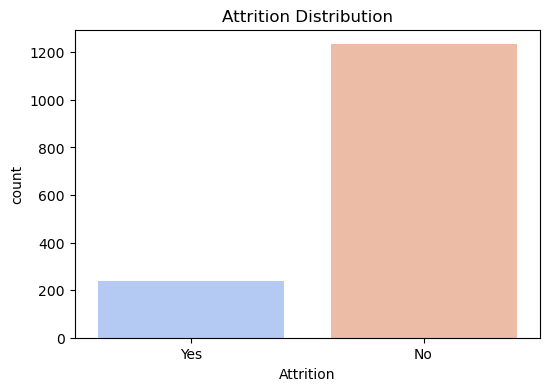

In [8]:
# Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Attrition'], palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

### Observations:
- The dataset is **imbalanced**, with a majority of employees **not leaving**.
- Further analysis will explore potential attrition drivers.

In [9]:
def bar_chart_viz(df, x, ax = None):
    resigned = df.query('Attrition == "Yes"')
    plt.figure(figsize= (10,5))
    order = resigned[x].value_counts().index
    #Create plot and title
    ax = sns.countplot(
        data = resigned
        ,x = x
        ,order = order
        ,palette= 5*["#4978d0"] + 6*["#7886a0"]
    )
    ax.set_title(f'Number of Employee Resigned by {x}')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
    # Add percentage
    total = resigned.shape[0]
    for pct in ax.patches:
        ax.annotate(f'{round(pct.get_height()/resigned.shape[0]*100, 1)}%'
                    ,(pct.get_x() + pct.get_width() / 2, pct.get_height())
                    ,ha = 'center', va = 'bottom'
                    )

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\3502846616.py:6: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\3502846616.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\

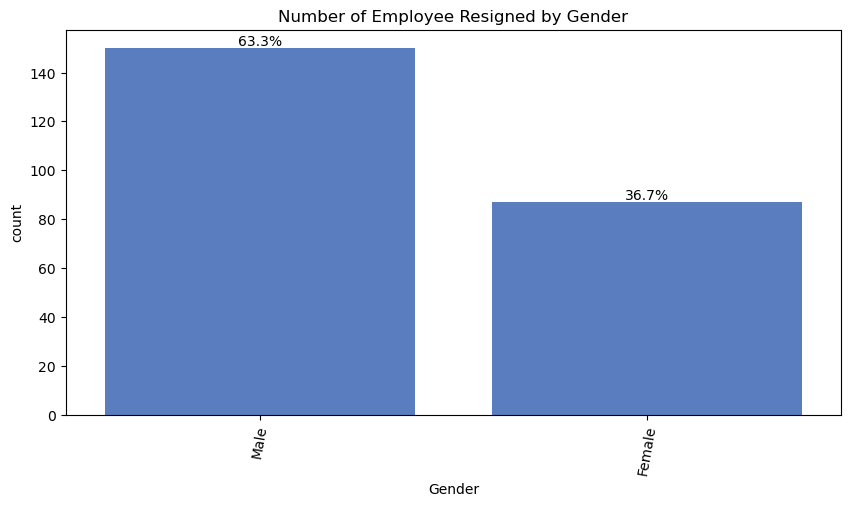

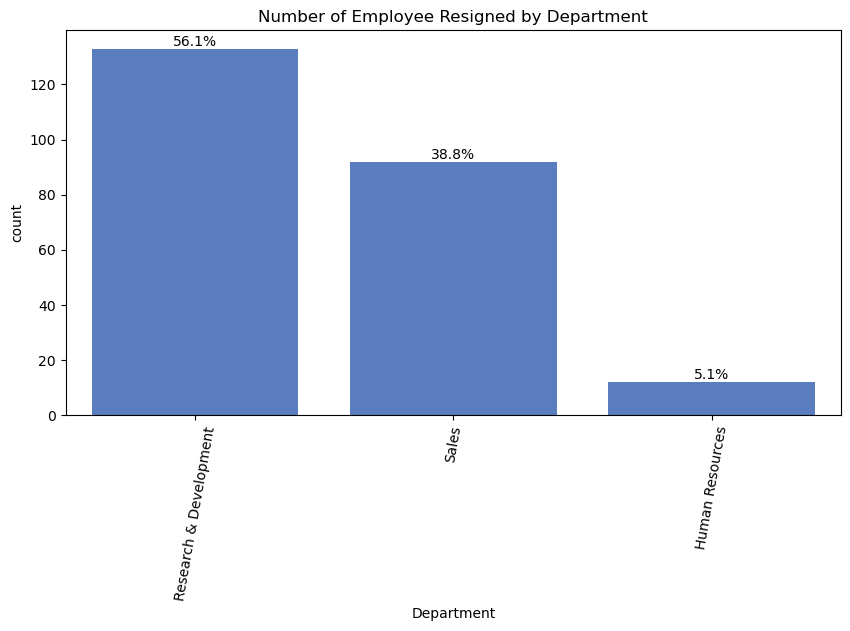

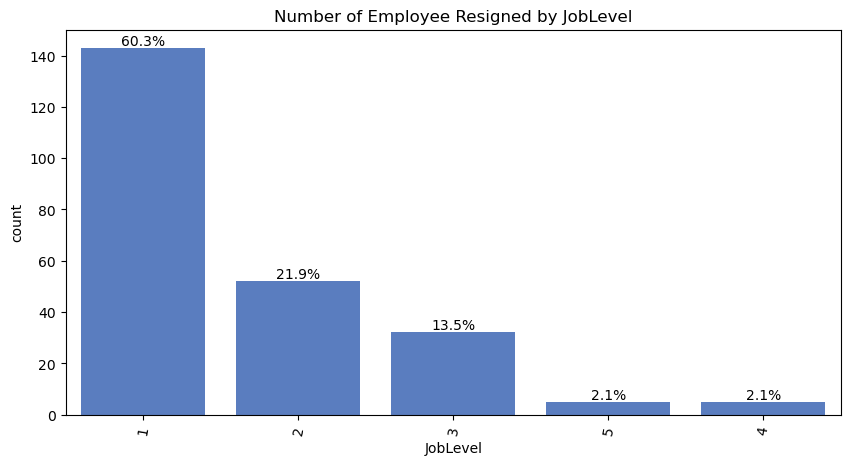

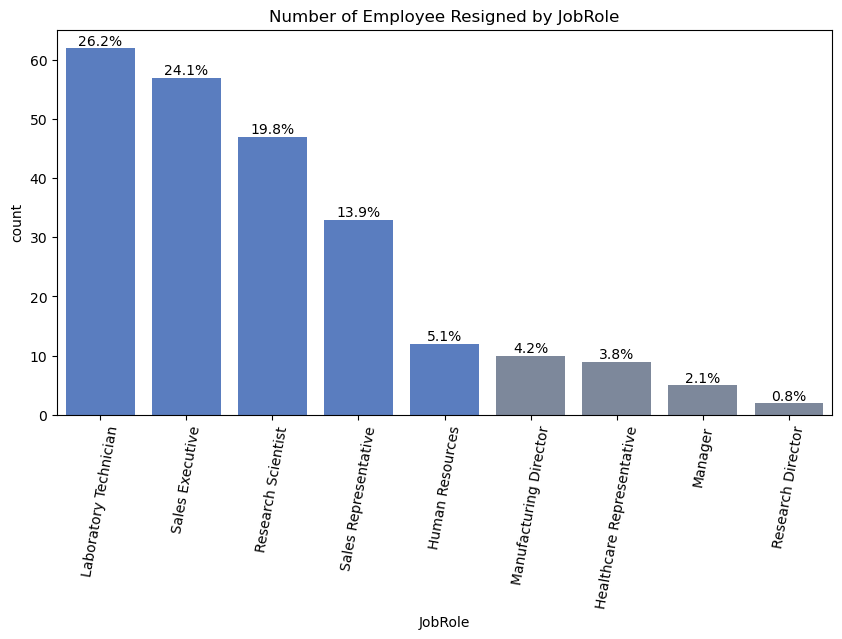

In [10]:
# Group distribution
group = ['Gender', 'Department', 'JobLevel', 'JobRole']
#Creating subplots
for i in group:
    bar_chart_viz(df, i)

## Compensation
Let's dive deeper to the next topic. We know that certain groups of people are more likely to leave but why? One of the reason that employee resigned are due to lack of the compensation. Lets see that wheter employee that receives less salary will more likey to leave

In [11]:
import scipy.stats as  stats
# Creating boxen plot function
def viz_boxen_plot(df, x, y):
    # Seperating attrition
    resigned = df.query(f"{y} == 'Yes'")[x]
    stayed = df.query(f"{y} == 'No'")[x]
    
    stat_resigned, p_resigned = stats.shapiro(resigned)
    stat_stayed, p_stayed = stats.shapiro(stayed)
    
    print(f'P-value resigned normality: {p_resigned: .5f}, Stayed: {p_stayed: .5f}')
    
    if p_resigned < 0.05 or p_stayed <0.05:
        print('Data not normally distributed, using Mann-Whitney U Test')
        stat, p = stats.mannwhitneyu(resigned, stayed, alternative='two-sided')
    else:
        print("Data normally distributed")
        stat, p = stats.ttest_ind(resigned, stayed)
        
    # Output of hypotesis testing
    print(f'Statistical test: {stat: .5f}, P-value: {p:.5f} ')
    
    # Result
    alpha = 0.05
    if p<alpha:
        test_result = print(f"Reject null hypotesis. There is a significant difference of {x} of people who stayed and resigned")
    else:
        test_result = print(f'Failed to reject null hypotesis. There is no significant difference of {x}')
    
    ax = sns.boxenplot(data = df, x = x, y = y, hue = y, alpha = 0.8)
    plt.suptitle(f'Distribution of {y} by {x}')
    plt.ylabel(f'{y}')
    plt.title(test_result, size = 9)
    plt.xlabel(f'{x}')
    plt.tight_layout()
    
    # Create text
    median_attrition_yes = df.query(f"{y} == 'Yes'")[x].median()
    median_attrition_no = df.query(f"{y} == 'No'")[x].median()
    mean_attrition_yes = df.query(f"{y} == 'Yes'")[x].mean()
    mean_attrition_no = df.query(f"{y} == 'No'")[x].mean()
    
    plt.text(max(df[x]),0, f'Avg: {round(mean_attrition_yes, 1)} \nMedian:{median_attrition_yes}',
             ha = 'left', va = 'center', rotation = 0, size= 9
             ,bbox = dict(boxstyle = "roundtooth, pad=0.5", fc = 'orange', ec = 'r', lw = 0))
    plt.text(max(df[x]),1, f'Avg: {round(mean_attrition_no, 1)} \nMedian:{median_attrition_no
             }',
             ha = 'left', va = 'center', rotation = 0, size= 9
             ,bbox = dict(boxstyle = "roundtooth, pad=0.5", fc = 'orange', ec = 'r', lw = 0))


P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  100620.50000, P-value: 0.00000 
Reject null hypotesis. There is a significant difference of MonthlyIncome of people who stayed and resigned


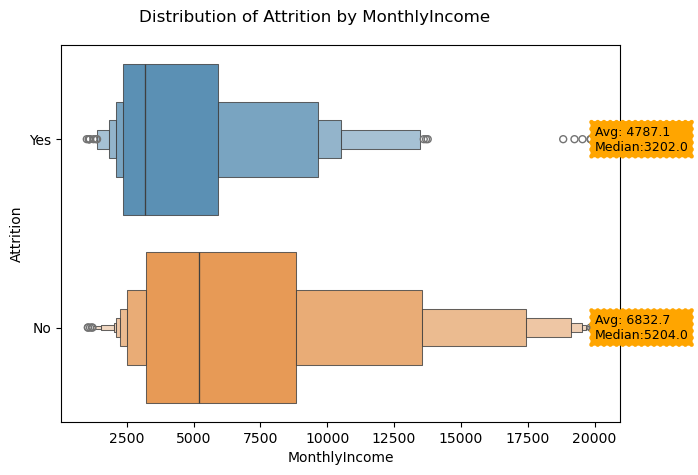

In [12]:
#Monthly Income & Attrition
viz_boxen_plot(df, 'MonthlyIncome', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  140726.50000, P-value: 0.36551 
Failed to reject null hypotesis. There is no significant difference of PercentSalaryHike


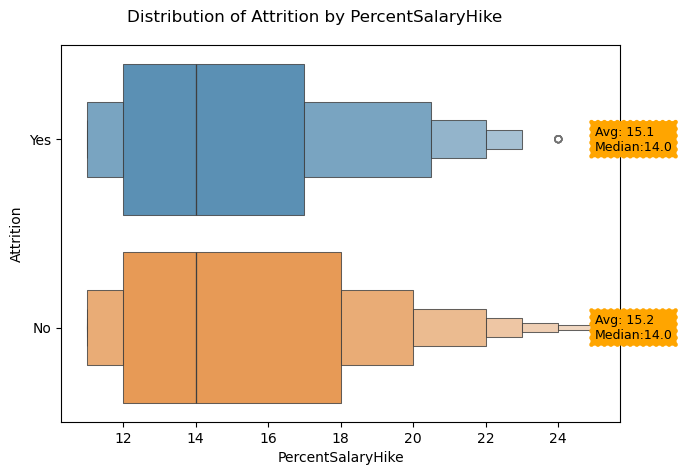

In [13]:
#Monthly Income & Attrition
viz_boxen_plot(df, 'PercentSalaryHike', 'Attrition')

## Work Environment

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  123362.50000, P-value: 0.00008 
Reject null hypotesis. There is a significant difference of JobSatisfaction of people who stayed and resigned


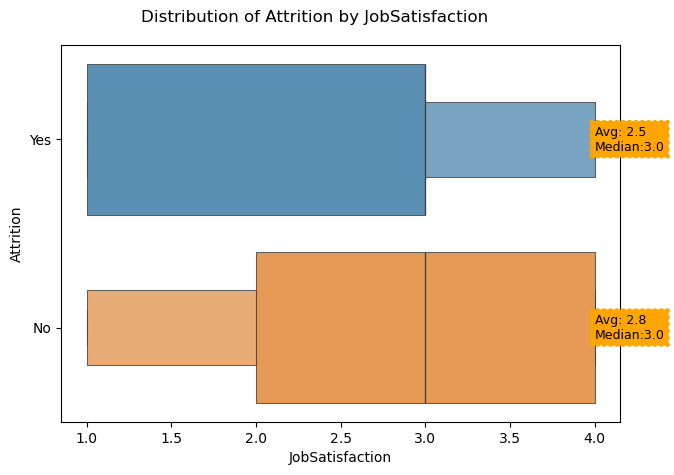

In [14]:
# Job Satisfaction & Attrition
viz_boxen_plot(df, 'JobSatisfaction', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  136678.50000, P-value: 0.10203 
Failed to reject null hypotesis. There is no significant difference of RelationshipSatisfaction


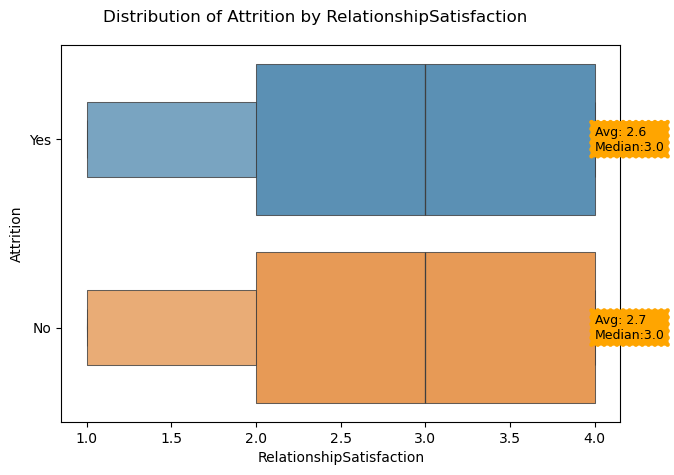

In [15]:
viz_boxen_plot(df, 'RelationshipSatisfaction', 'Attrition')

## Correlation Analysis

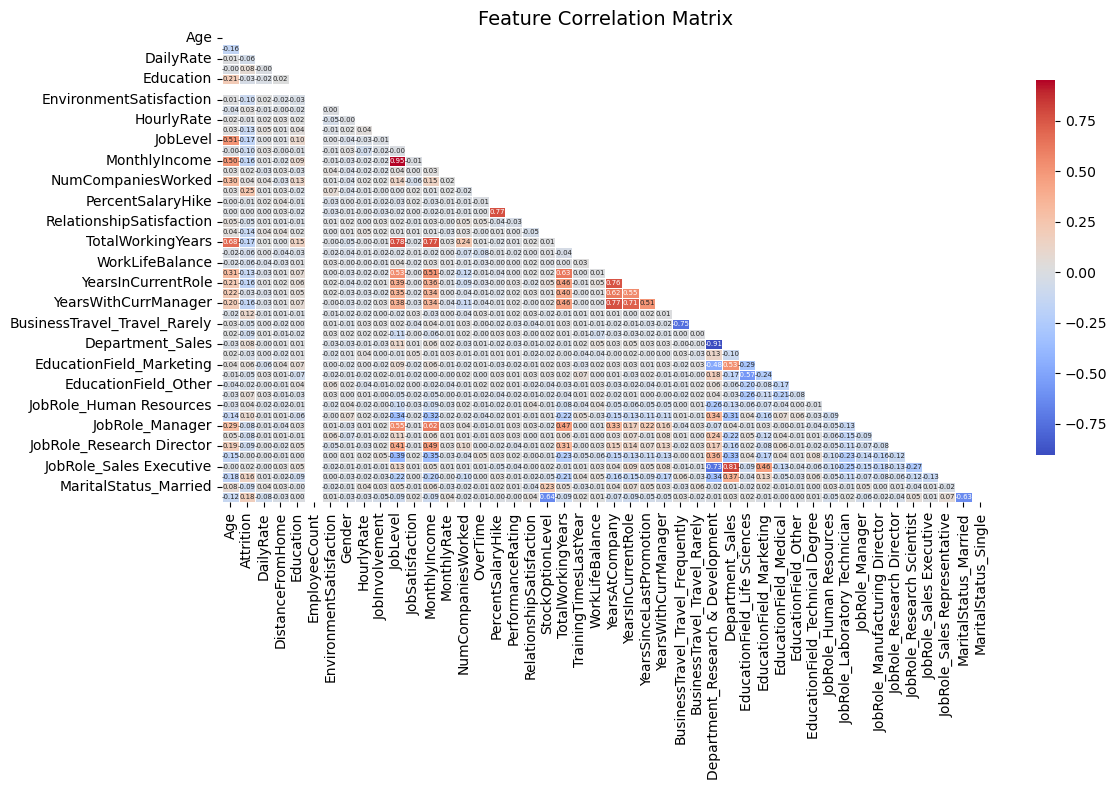

In [16]:
from sklearn.preprocessing import LabelEncoder
# Encode Binary Variables
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Label Encoding for Ordinal Variables
ordinal_features = ['Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
le = LabelEncoder()
for feature in ordinal_features:
    df[feature] = le.fit_transform(df[feature])

# One-Hot Encoding for Nominal Variables
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Drop unneeded columns
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
corr_matrix = df.corr()
# Buat mask untuk hanya menampilkan segitiga bawah
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Atur ukuran figure
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask,  # Menghilangkan segitiga atas
    cmap="coolwarm",  # Warna yang lebih enak dilihat
    annot=True,  # Bisa diubah ke True jika ingin menampilkan angka
    fmt=".2f",
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}  # Mengecilkan color bar
    ,annot_kws={'size':5}
)

# Judul
plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
# Encode variabel kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Split data menjadi Train & Test Set
X = df.drop(columns=['Attrition'])  # Fitur
y = df['Attrition']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitur yang dipilih oleh RFE: Index(['Age', 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'TotalWorkingYears', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'JobRole_Research Director',
       'MaritalStatus_Single'],
      dtype='object')


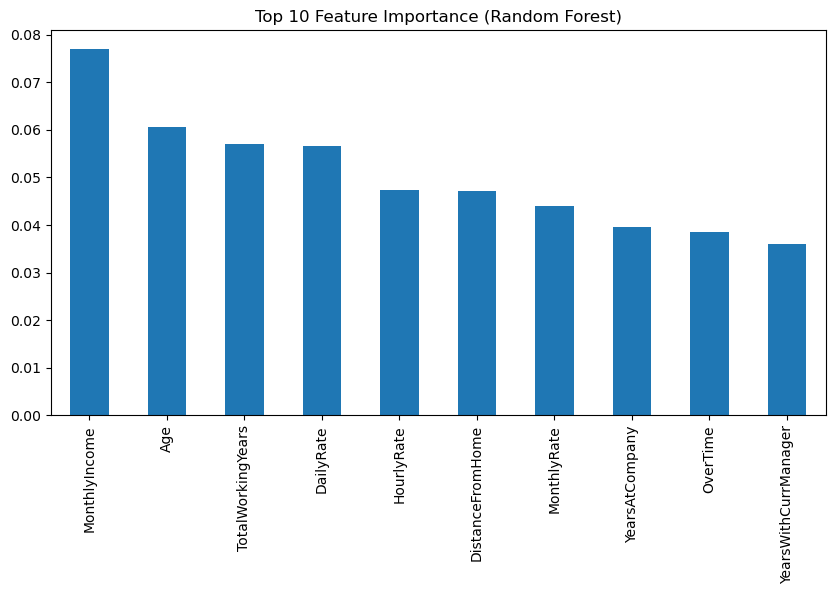

In [18]:
# Gunakan Logistic Regression untuk RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Print fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)

# Gunakan Random Forest untuk feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Visualisasi feature importance
plt.figure(figsize=(10,5))
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [20]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train & evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Check if model supports prob

    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

print("\nModel training complete!\n")


Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training Gradient Boosting...
Training K-Nearest Neighbors...

Model training complete!



                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     0.860544   0.615385  0.340426  0.438356  0.807908
Random Forest           0.836735   0.454545  0.106383  0.172414  0.772676
Support Vector Machine  0.867347   0.900000  0.191489  0.315789  0.812904
Gradient Boosting       0.853741   0.611111  0.234043  0.338462  0.794384
K-Nearest Neighbors     0.846939   0.625000  0.106383  0.181818  0.636101


C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_4684\3321964592.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="Blues")


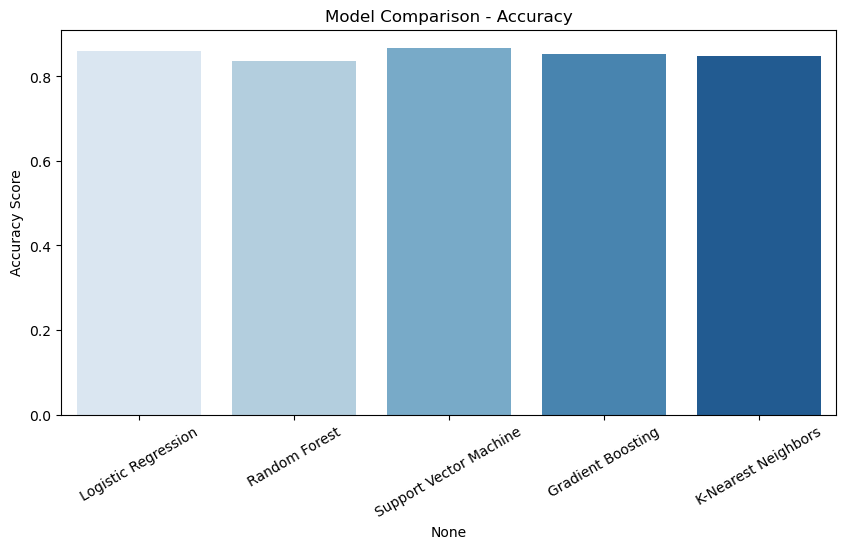

In [21]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print summary
print(results_df)

# Plot comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="Blues")
plt.title("Model Comparison - Accuracy")
plt.xticks(rotation=30)
plt.ylabel("Accuracy Score")
plt.show()


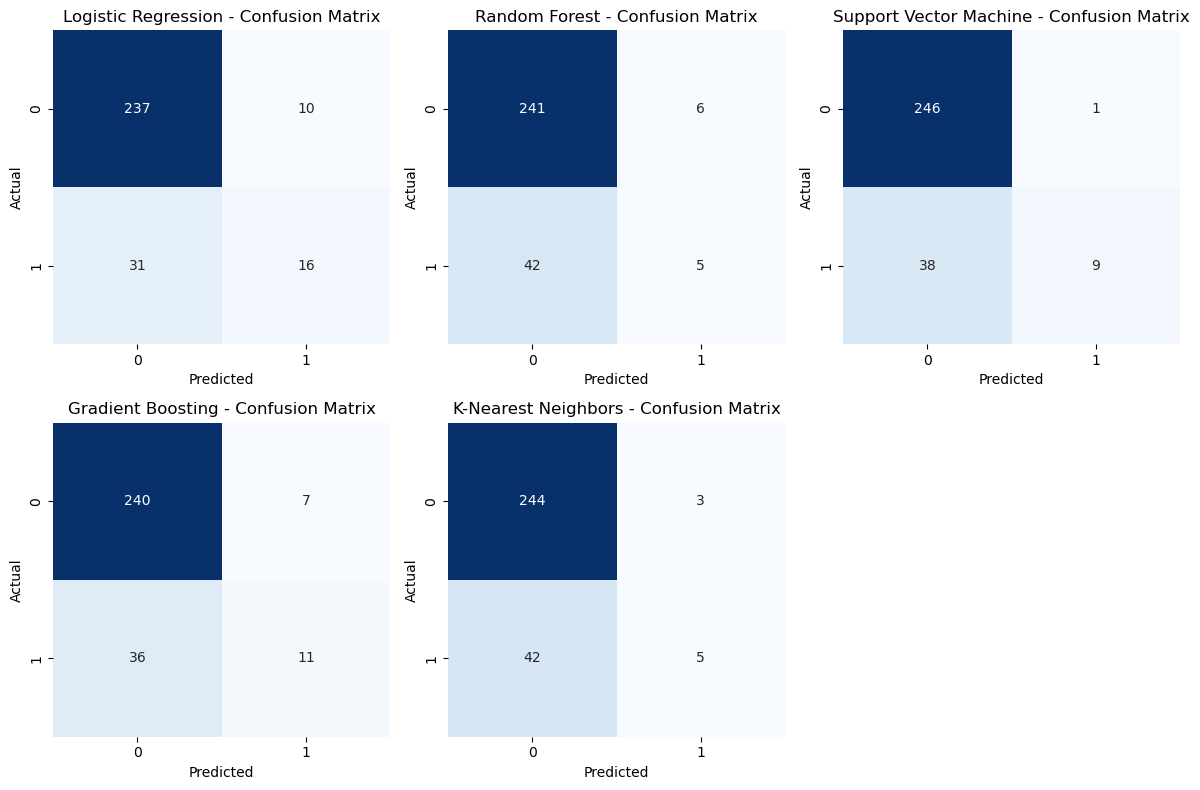

In [22]:
plt.figure(figsize=(12,8))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [23]:
# Model terbaik berdasarkan Accuracy & F1-Score
best_model = results_df["F1-Score"].idxmax()
print(f"\n🔥 Model terbaik berdasarkan F1-Score: {best_model} 🔥")

# Kesimpulan
print("""
Dari hasil evaluasi, kita bisa melihat bahwa model dengan performa terbaik adalah model yang memiliki:
1. Akurasi tinggi (Accuracy)
2. Kemampuan mendeteksi karyawan yang akan resign (Recall tinggi)
3. Konsistensi antara presisi & recall (F1-score tinggi)
4. Kemampuan membedakan kelas dengan baik (ROC-AUC tinggi)

Dari hasil analisis ini, kita bisa menyarankan perusahaan untuk menggunakan model ini sebagai prediktor utama dalam pengambilan keputusan strategis terkait retensi karyawan.
""")



🔥 Model terbaik berdasarkan F1-Score: Logistic Regression 🔥

Dari hasil evaluasi, kita bisa melihat bahwa model dengan performa terbaik adalah model yang memiliki:
1. Akurasi tinggi (Accuracy)
2. Kemampuan mendeteksi karyawan yang akan resign (Recall tinggi)
3. Konsistensi antara presisi & recall (F1-score tinggi)
4. Kemampuan membedakan kelas dengan baik (ROC-AUC tinggi)

Dari hasil analisis ini, kita bisa menyarankan perusahaan untuk menggunakan model ini sebagai prediktor utama dalam pengambilan keputusan strategis terkait retensi karyawan.

